# Avocado Dataset

Lets start this project by importing some libraries first!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,boxcox
from numpy import sqrt,log
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split,KFold
from sklearn.linear_model    import Lasso,Ridge,RidgeClassifier,LassoCV,SGDClassifier,SGDRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler,minmax_scale
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BaseNB
from sklearn.svm import SVC,SVR
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report,auc,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
avo=pd.read_csv('avocado.csv')
avo=pd.DataFrame(avo)
avo

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [3]:
avo1=avo.copy()
avo2=avo.copy()

what i did here is that i made some copy of it so, in any accident i might wont lose the data as i made a copy of it

In [4]:
avo1

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [17]:
avo1.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [5]:
avo1.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [6]:
avo1.info

<bound method DataFrame.info of       Unnamed: 0        Date  AveragePrice  Total Volume      4046       4225  \
0              0  27-12-2015          1.33      64236.62   1036.74   54454.85   
1              1  20-12-2015          1.35      54876.98    674.28   44638.81   
2              2  13-12-2015          0.93     118220.22    794.70  109149.67   
3              3  06-12-2015          1.08      78992.15   1132.00   71976.41   
4              4  29-11-2015          1.28      51039.60    941.48   43838.39   
...          ...         ...           ...           ...       ...        ...   
1512          10  16-10-2016          1.39     190846.01  57529.11   56366.66   
1513          11  09-10-2016          1.51     178235.75  43325.87   52189.61   
1514          12  02-10-2016          1.48     178410.82  46364.75   52893.38   
1515          13  25-09-2016          1.47     189131.52  54110.79   53593.58   
1516          14  18-09-2016          1.43     182978.30  43116.41   54193.42

Observation:
    
        as i can see more clearly by using 'info' method that only the region column has the object type values whihc is string and the rest is in float and int values

In [7]:
avo1.shape

(1517, 14)

In [8]:
avo1.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

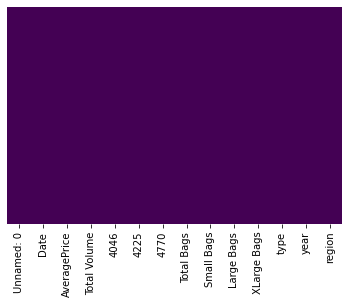

In [9]:
sns.heatmap(avo1.isnull(),yticklabels=False,cmap='viridis',cbar=False)

Observation-: what i found from here is that as per the description of the dataset there is column which i am unfamiliar with that is "Unnamed" column as per the description provided. So to began out further analysis i am going to drop this particular column, and also for the date column, as per the models for to predict well i also be dropping it

In [11]:
avo1.drop('Unnamed: 0',axis=1,inplace=True)
avo1.drop('Date',axis=1,inplace=True)

In [12]:
avo1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


# Data Visualization

In [13]:
avo1.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


Observation-:

        First in the total count section in every column there are total 1517 values which concludes that there are not missing values present in the data rest

Now, by obseving more what i got is,

       1. AveragePrice- In this column the 'mean' is a bit lower than the 'median', the s.t.d is less and the 75% of the data is lesser than the max
        
       2. Total Volume- In this column the 'mean' is lower than the 'median', and the s.t.d is quite high than the 'mean', and there's a huge difference between 75% of the and the max, so outliers are present and also huge skewness is present
        
       3. 4046- In this column, the 'mean' is lower than the 'median', and the s.t.d is also lower than the 'mean', and there's a difference between 75% of the and the max, so the data is not well distributed, outliers are present and also huge skewness is present
        
       4. 4225- In this column, the 'mean' is quite higher than the 'median', and the s.t.d is lower than the 'mean', and there's a difference between 75% of the and the max, so outliers are present and also huge skewness is present
        
       5. 4770- In this column, the 'mean' is lower than the 'median', and the s.t.d is lower than the mean, and there's not much of a  difference in between 75% and max data, but the 25% of the data is quite higher than the rest,  so outliers are present and also huge skewness is present
        
       6. Total Bags- In this column, the 'mean' is quite lower than the 'median', and the s.t.d is quite high than the mean, and there's a huge difference between 75% of the and the max, so outliers are present and also huge skewness is present
        
       7. Small Bags- In this column, the 'mean' is lower than the 'median', and the s.t.d is quite high, and there's a  difference between 75% of the and the max which is high, so outliers are present and also huge skewness is present
        
       8. Large Bags- In this column, the 'mean' is higher than the 'median', and the s.t.d is quite high, and there's a huge difference between 75% of the and the max, so outliers are present and also huge skewness is present
        

In [16]:
print(avo1.groupby('region').size())
print('\n')
print('\n')
print(avo1.groupby('year').size())

region
Albany                 67
Atlanta                54
BaltimoreWashington    65
Boise                  65
Boston                 62
BuffaloRochester       51
California             76
Charlotte              31
Chicago                23
Columbus               47
DallasFtWorth          17
Denver                 24
Detroit                40
GrandRapids            23
GreatLakes             18
HarrisburgScranton     19
HartfordSpringfield    13
Houston                29
Indianapolis           16
Jacksonville           41
LasVegas               10
LosAngeles              3
Louisville             34
MiamiFtLauderdale      17
Midsouth               18
Nashville              25
NewYork                44
Northeast              12
NorthernNewEngland     29
Orlando                21
Philadelphia           13
PhoenixTucson          52
Pittsburgh             22
Plains                 12
Portland               30
RaleighGreensboro      16
RichmondNorfolk        21
Roanoke                17
SanDi

From this i have conclude that there are total 51 total cities along with countries places which the data has been distributed overt the places

and in year column there most of the oders are from 2015 and at minimum in 2016

now, i am going to visualize using box plot method to see the outliers present in each column

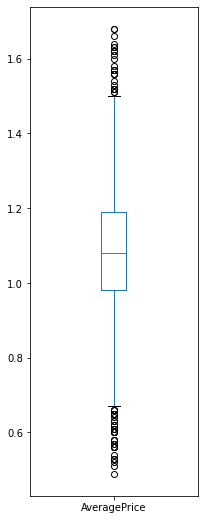

In [25]:
plt.figure(figsize=(3,9))
avo1['AveragePrice'].plot.box()
plt.show()

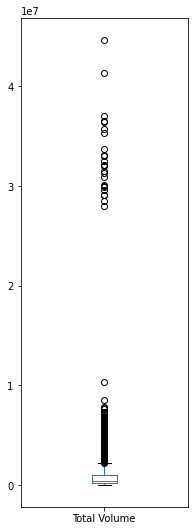

In [26]:
plt.figure(figsize=(3,9))
avo1['Total Volume'].plot.box()
plt.show()

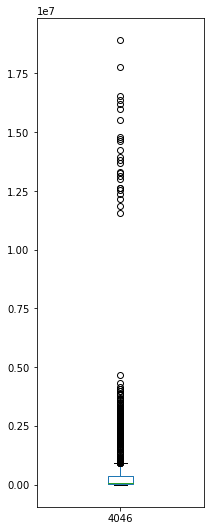

In [27]:
plt.figure(figsize=(3,9))
avo1['4046'].plot.box()
plt.show()

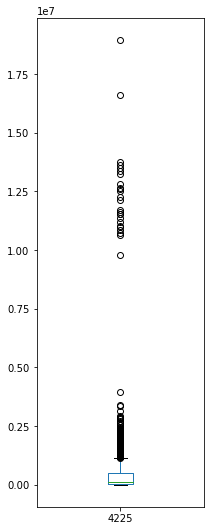

In [28]:
plt.figure(figsize=(3,9))
avo1['4225'].plot.box()
plt.show()

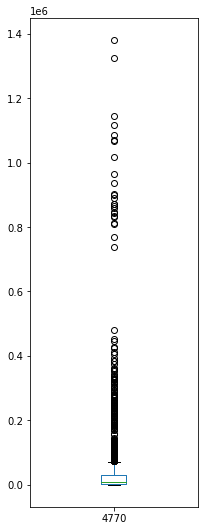

In [29]:
plt.figure(figsize=(3,9))
avo1['4770'].plot.box()
plt.show()

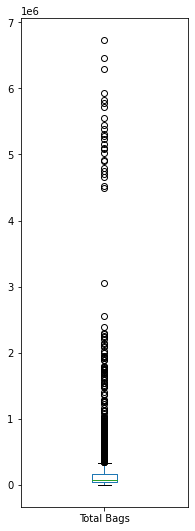

In [30]:
plt.figure(figsize=(3,9))
avo1['Total Bags'].plot.box()
plt.show()

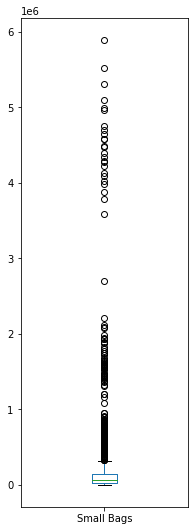

In [31]:
plt.figure(figsize=(3,9))
avo1['Small Bags'].plot.box()
plt.show()    

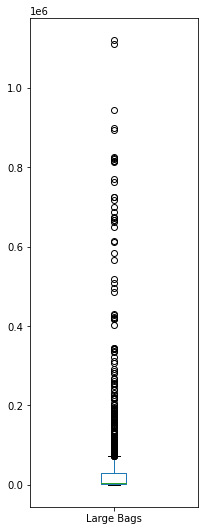

In [32]:
plt.figure(figsize=(3,9))
avo1['Large Bags'].plot.box()
plt.show()     

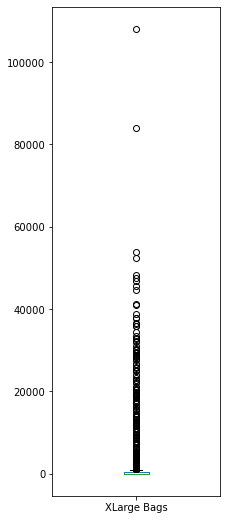

In [33]:
plt.figure(figsize=(3,9))
avo1['XLarge Bags'].plot.box()
plt.show()    

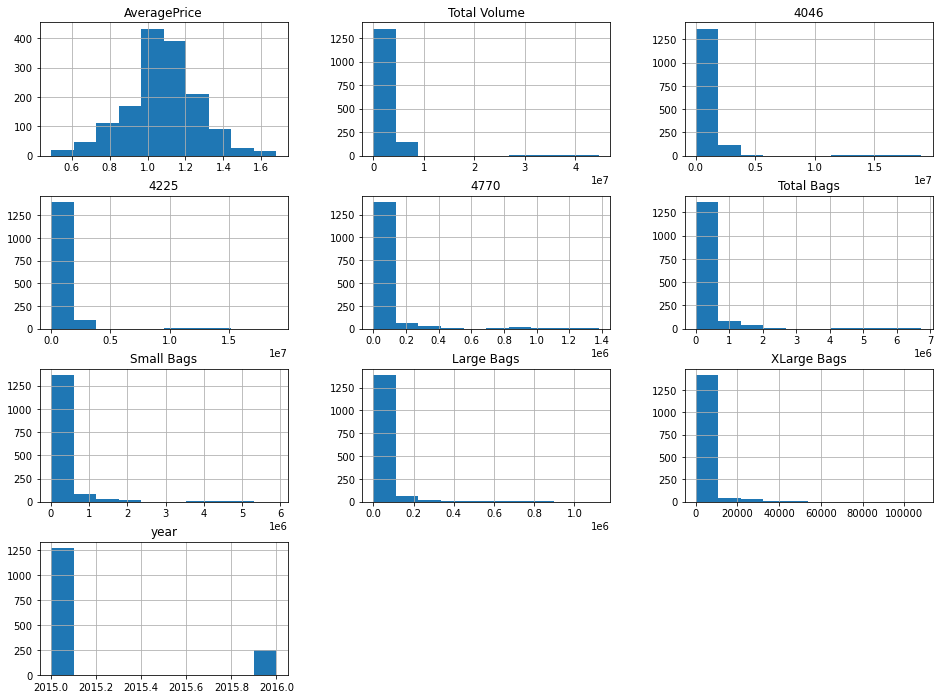

In [34]:
fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=16
fig_size[1]=12
plt.rcParams["figure.figsize"]=fig_size

avo1.hist()
plt.show()

Observation:
        
        what i have got from the visual analysis is that there are some huge outliers and skewness present in the dataset
        and from the histo plot i can see that all the values has been left skewed except 'Avarage price' column

In [35]:
avo1.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


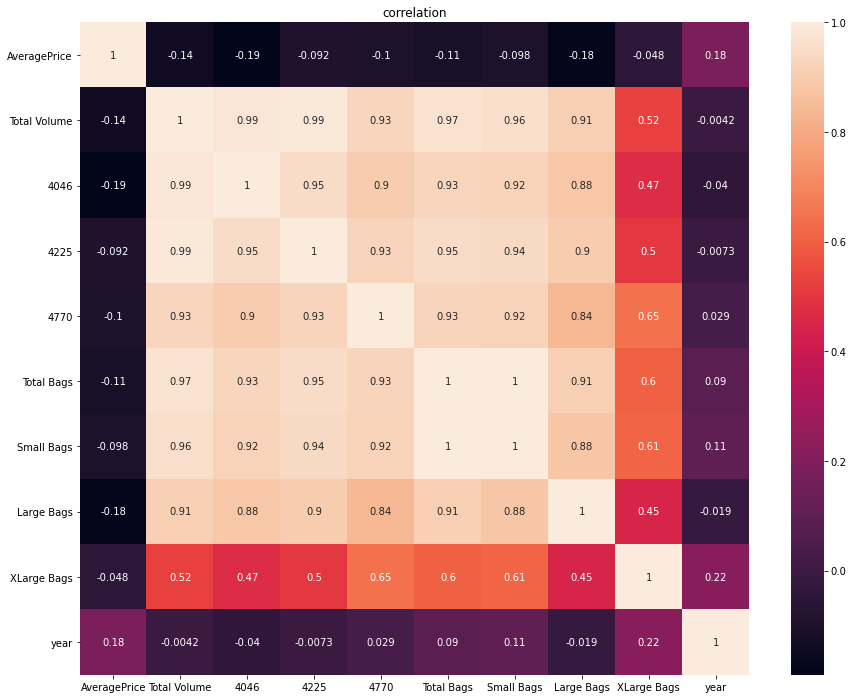

In [36]:
plt.figure(figsize=(15,12))
sns.heatmap(avo1.corr(),annot=True,)
plt.title('correlation')
plt.show()

Observation:
            
        What i got from observing the correlation is that the Avarage price which will be regressor type model is not related with any columns and has mostly negative values with other columns

# Data Cleaning

first i am going to check how much outliers are present and then i'll remove it, then how much skewness are present in the dataset, then i'll remove it using sqrt and log transformation


**Removing Outliers**

In [37]:
z=np.abs(zscore(avo1.iloc[:,:-3]))
threshold=3
print(np.where(z>threshold))

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
       1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
       1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
       1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
       1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
       1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
       1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
       1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
       1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
       1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
       1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
       1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
       1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
       1200, 1200, 1200, 1200, 1200, 1200, 1200, 1

In [38]:
avo1_new=avo1[(z<3).all(axis=1)]

In [40]:
#checking out the shape after and removing the outliers and comparing
print(avo1.shape)
avo1_new.shape

(1517, 12)


(1436, 12)

**Calculating the percentage loss of all columns**

In [41]:
x=(1436/1517)*100
100-x

5.3394858272907015

5.3% data has been lost which is normal.

lets try with another methong using IQR to remove the outliers fully

In [42]:
Q1=avo1.quantile(0.25)
Q3=avo1.quantile(0.75)
IQR=Q3-Q1
print(IQR)

AveragePrice         0.21
Total Volume    834505.09
4046            357178.14
4225            443674.28
4770             28256.05
Total Bags      121402.79
Small Bags      116472.13
Large Bags       28726.93
XLarge Bags        401.48
year                 0.00
dtype: float64


In [43]:
avo1_new2=avo1[~((avo1<(Q1-1.5*IQR))|(avo1>(Q3+1.5*IQR))).any(axis=1)]
print(avo1_new2.shape)

(881, 12)


In [44]:
x=(881/1517)*100
100-x

41.92485168094924

# Conclusion

soo, in **Zscore** method i am losing only 5% of the data but where as in **IQR** method am losing huge amount of valueble data which is 41% which is not normal, so i am going to stick with zscore method in this particular problem

In [45]:
avo1_new.skew()

AveragePrice   -0.184770
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
year            2.004439
dtype: float64

so, in here except 'AveragePrice', over 4.4 amount of skeness exist, i'll be using sqrt and log transformation to deal with the skewness

In [46]:
avo1_new['Total Volume']=log(avo1_new['Total Volume'])
avo1_new['4046']=sqrt(avo1_new['4046'])
avo1_new['4225']=sqrt(avo1_new['4225'])
avo1_new['4770']=sqrt(avo1_new['4770'])
avo1_new['Total Bags']=log(avo1_new['Total Bags'])
avo1_new['Small Bags']=log(avo1_new['Small Bags'])
avo1_new['Large Bags']=sqrt(avo1_new['Large Bags'])
avo1_new['XLarge Bags']=sqrt(avo1_new['XLarge Bags'])

we know that log is a more powerful transformation than sqrt and where the data is imbalanced and where are not speared well chances that i'll end up having NaN values and nagetive data

In [47]:
avo1_new.skew()

AveragePrice   -0.184770
Total Volume    0.462892
4046            1.882842
4225            1.380059
4770            1.773953
Total Bags      0.378608
Small Bags      0.420794
Large Bags      1.696494
XLarge Bags     2.826879
year            2.004439
dtype: float64

Now i'll be using sqrt to deal with the rest of the skewness which is stll present

those are

column - **4046**

column - **4225**

column - **4770**

column - **Large Bags**

column - **XLarge Bags**

In [48]:
avo1_new['4046']=sqrt(avo1_new['4046'])
avo1_new['4225']=sqrt(avo1_new['4225'])
avo1_new['4770']=sqrt(avo1_new['4770'])
avo1_new['Large Bags']=sqrt(avo1_new['Large Bags'])
avo1_new['XLarge Bags']=sqrt(avo1_new['XLarge Bags'])

In [49]:
avo1_new.skew()

AveragePrice   -0.184770
Total Volume    0.462892
4046            0.875523
4225            0.763938
4770            0.696428
Total Bags      0.378608
Small Bags      0.420794
Large Bags      0.442490
XLarge Bags     1.369467
year            2.004439
dtype: float64

i'll repeat the same prossess until it gets close to 0.5 or lesser than 0.5

The columns are

column - **4046**

column - **4225**

column - **4770**

column - **XLarge Bags**

In [50]:
avo1_new['4046']=sqrt(avo1_new['4046'])
avo1_new['4225']=sqrt(avo1_new['4225'])
avo1_new['4770']=sqrt(avo1_new['4770'])
avo1_new['XLarge Bags']=sqrt(avo1_new['XLarge Bags'])

In [51]:
avo1_new.skew()

AveragePrice   -0.184770
Total Volume    0.462892
4046            0.295764
4225            0.411364
4770            0.095129
Total Bags      0.378608
Small Bags      0.420794
Large Bags      0.442490
XLarge Bags     0.626751
year            2.004439
dtype: float64

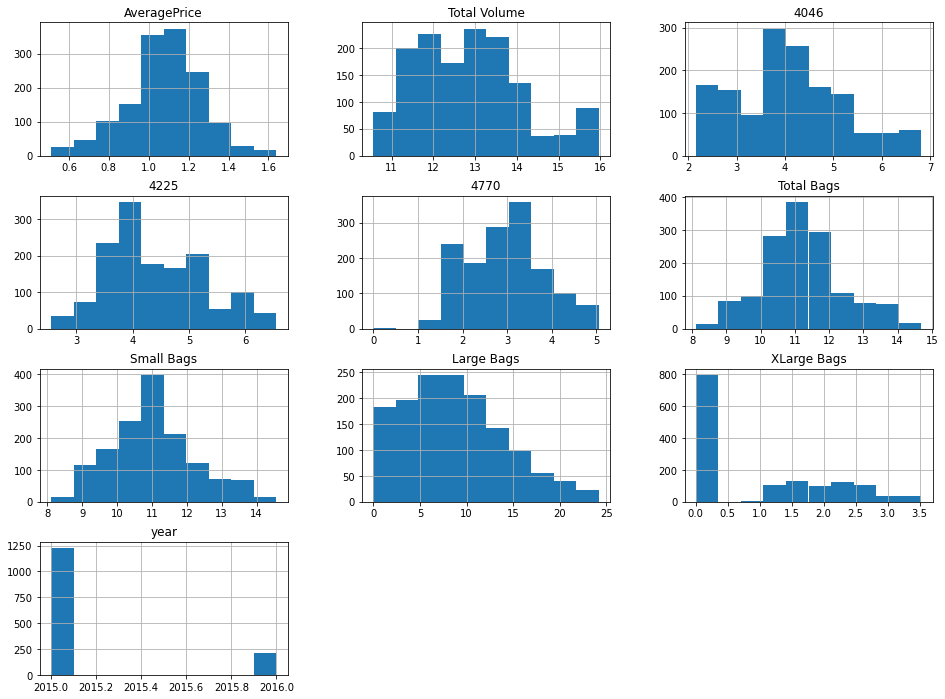

In [52]:
fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=16
fig_size[1]=12
plt.rcParams["figure.figsize"]=fig_size

avo1_new.hist()
plt.show()

as we can see that there the skewness is normalized and the data is now ready for to train

# Checking for if the Data is Normalized or not

ValueError: num must be 1 <= num <= 8, not 9

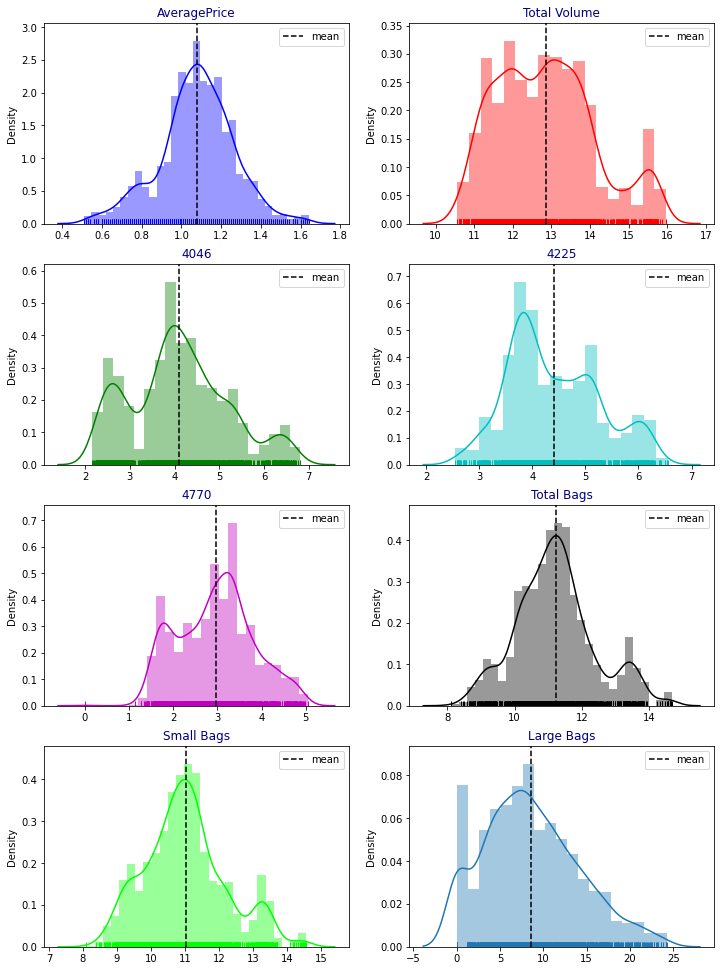

In [53]:
import itertools

colls=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags']
Len=len(colls)
cs=['b','r','g','c','m','k','lime']
fig=plt.figure(figsize=(12,17))

for i,j,k in itertools.zip_longest(colls,range(Len),cs):
    plt.subplot(4,2,j+1)
    ax= sns.distplot(avo1_new[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(avo1_new[i].mean(),linestyle='dashed',label='mean',color='k')
    plt.legend(loc='best')
    plt.title(i,color='navy')
    plt.xlabel('')

# Model Traning 

Before traing and spliting the modle i'll be first checking the colums and its unique type to see diffrence and other uniqueness is present

In [54]:
avo1_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,11.070329,2.382093,3.908450,1.623065,9.070718,9.059938,3.107508,0.000000,conventional,2015,Albany
1,1.35,10.912849,2.257382,3.812537,1.662404,9.159632,9.149323,3.142245,0.000000,conventional,2015,Albany
2,0.93,11.680304,2.304228,4.263368,1.838448,9.005202,8.992459,3.186814,0.000000,conventional,2015,Albany
3,1.08,11.277104,2.408412,4.047145,1.708449,8.667535,8.644249,3.400804,0.000000,conventional,2015,Albany
4,1.28,10.840357,2.353566,3.803924,1.717688,8.729713,8.697222,3.749697,0.000000,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,12.159222,3.935374,3.925345,3.392175,10.992360,10.795968,10.087507,1.984219,conventional,2016,Charlotte
1513,1.51,12.090862,3.798336,3.887747,3.435816,11.055652,10.909695,9.629000,0.000000,conventional,2016,Charlotte
1514,1.48,12.091844,3.830659,3.894262,3.372558,11.041573,10.884303,9.532808,2.315031,conventional,2016,Charlotte
1515,1.47,12.150198,3.905355,3.900669,3.391295,11.065571,10.926900,9.538603,0.000000,conventional,2016,Charlotte


In [55]:
avo1_new['type'].unique()

array(['conventional'], dtype=object)

since theres only one type value is present in column so i'll be dropping that column, since is not gonna useful for the models to predict well

In [56]:
avo1_new.drop('type',axis=1,inplace=True)

In [57]:
avo1_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,11.070329,2.382093,3.908450,1.623065,9.070718,9.059938,3.107508,0.000000,2015,Albany
1,1.35,10.912849,2.257382,3.812537,1.662404,9.159632,9.149323,3.142245,0.000000,2015,Albany
2,0.93,11.680304,2.304228,4.263368,1.838448,9.005202,8.992459,3.186814,0.000000,2015,Albany
3,1.08,11.277104,2.408412,4.047145,1.708449,8.667535,8.644249,3.400804,0.000000,2015,Albany
4,1.28,10.840357,2.353566,3.803924,1.717688,8.729713,8.697222,3.749697,0.000000,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,12.159222,3.935374,3.925345,3.392175,10.992360,10.795968,10.087507,1.984219,2016,Charlotte
1513,1.51,12.090862,3.798336,3.887747,3.435816,11.055652,10.909695,9.629000,0.000000,2016,Charlotte
1514,1.48,12.091844,3.830659,3.894262,3.372558,11.041573,10.884303,9.532808,2.315031,2016,Charlotte
1515,1.47,12.150198,3.905355,3.900669,3.391295,11.065571,10.926900,9.538603,0.000000,2016,Charlotte


Now, there's year and region column and where the region is my target varible, and it is in **str** so for our models to learn i'll be converting them to int bt using **LabelEncoder**

In [58]:
le=LabelEncoder()
avo1_new['region']=le.fit_transform(avo1_new['region'])
avo1_new['year']=le.fit_transform(avo1_new['year'])

In [59]:
avo1_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,11.070329,2.382093,3.908450,1.623065,9.070718,9.059938,3.107508,0.000000,0,0
1,1.35,10.912849,2.257382,3.812537,1.662404,9.159632,9.149323,3.142245,0.000000,0,0
2,0.93,11.680304,2.304228,4.263368,1.838448,9.005202,8.992459,3.186814,0.000000,0,0
3,1.08,11.277104,2.408412,4.047145,1.708449,8.667535,8.644249,3.400804,0.000000,0,0
4,1.28,10.840357,2.353566,3.803924,1.717688,8.729713,8.697222,3.749697,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,12.159222,3.935374,3.925345,3.392175,10.992360,10.795968,10.087507,1.984219,1,7
1513,1.51,12.090862,3.798336,3.887747,3.435816,11.055652,10.909695,9.629000,0.000000,1,7
1514,1.48,12.091844,3.830659,3.894262,3.372558,11.041573,10.884303,9.532808,2.315031,1,7
1515,1.47,12.150198,3.905355,3.900669,3.391295,11.065571,10.926900,9.538603,0.000000,1,7


Now, this is our final Dataset which is ready for train test split

# Train test Split



In [60]:
# Splitting out the model in two diffent sets one will be captial X and other will be small x so we can identify
X=avo1_new.drop('AveragePrice',axis=1)
Y=avo1_new['AveragePrice']

# Capital X and Y is going to be our reggressor

x=avo1_new.drop('region',axis=1)
y=avo1_new['region']

# Small x and y is going to be our classification

In [61]:
#checking the shape of each models 
print(Y.shape,'--',X.shape)
print(y.shape,'--',x.shape)

(1436,) -- (1436, 10)
(1436,) -- (1436, 10)


Now, i'll be checking the "Best Randomstate" for the models in which they'll perform well by using for loop method

In [62]:
sc=StandardScaler()
X_t=sc.fit_transform(X)
Lr=LinearRegression()

max_scr=0
for i in range(0,1000):
    X_train,X_test,Y_train,Y_test=train_test_split(X_t,Y,test_size=0.25,random_state=i,shuffle=True)
    Lr.fit(X_train,Y_train)
    pred_X_train=Lr.predict(X_train)
    pred_X_test=Lr.predict(X_test)
    if round(r2_score(Y_train,pred_X_train)*100,2)==round(r2_score(Y_test,pred_X_test)*100,2):
        print('random',i,'model performs well')
        print('the RDS',i)
        print('train r2score-:',r2_score(Y_train,pred_X_train)*100)
        print('test r2score-:',r2_score(Y_test,pred_X_test)*100)

random 800 model performs well
the RDS 800
train r2score-: 40.37537132744866
test r2score-: 40.3768714549901


In [63]:
sc=StandardScaler()
x_t=sc.fit_transform(x)
lr=LogisticRegression()

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=0.25,random_state=i,shuffle=True)
    lr.fit(x_train,y_train)
    pred_x_train=lr.predict(x_train)
    pred_x_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_x_train)*100,2)==round(accuracy_score(y_test,pred_x_test)*100,2):
        print('random',i,'model performs well')
        print('the RDS',i)       
        print('train accuracy score-:',accuracy_score(y_train,pred_x_train)*100)
        print('test accuracy score-:',accuracy_score(y_test,pred_x_test)*100)

random 164 model performs well
the RDS 164
train accuracy score-: 94.42896935933148
test accuracy score-: 94.42896935933148
random 306 model performs well
the RDS 306
train accuracy score-: 93.31476323119777
test accuracy score-: 93.31476323119777


Conclusion:
    
        At random state 800 the model is performing well than the rest in Regression 
        
        At random state 164 the model is performing well than the rest in Classification  

In [64]:
#The point of using shuffle in train_test_split so the model will have the best alnalysis and it wont overlap on eachother or ge confused over columns
testsize = 0.25
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=testsize,random_state=800,shuffle=True)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=testsize,random_state=164,shuffle=True)

In [65]:
#for evaluation matrix
num_of_folds = 11
seed1 = 42
scoring_cf = 'accuracy'
scoring_re = 'r2'
kfold = KFold(n_splits=num_of_folds, random_state=seed1)# the number of folds will do over the splited data

In [66]:
# Spot Check Algorithms
Cf_models = []
Re_models = []
Re_models.append(('Lasso',Lasso()))
Cf_models.append(('LogisticRegression', LogisticRegression()))
Re_models.append(('LinearRegression', LinearRegression()))
Cf_models.append(('KNeighborsClassifier', KNeighborsClassifier()))
Re_models.append(('KNeighborsRegressor', KNeighborsRegressor()))
Cf_models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
Re_models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
Cf_models.append(('GaussianNB', GaussianNB()))
Cf_models.append(('MultinomialNB', MultinomialNB()))
Cf_models.append(('SVM', SVC()))
Re_models.append(('SVR', SVR()))
results_of_Cf_mod = []
results_of_Re_mod = []
names = []
names2 = []

In here i have used total 11 model in both Regression and Classification set

5 in Regression

6 in Classification

Now, i'll be checking the models performence in a single loop by using for loop method to generate **Mean**,**Std** and **CrossvalScore**

In [76]:
for name, re_models in Re_models:
    cv_results_for_re = cross_val_score(re_models, X_train, Y_train, cv=kfold,scoring=scoring_re)
    results_of_Re_mod.append(cv_results_for_re)
    names2.append(name)
    print(f'\n\nNames-: {name}, The Mean-: {cv_results_for_re.mean()*100},\nThe Std-: {cv_results_for_re.std()*100},\n cross_val_score-:{cv_results_for_re*100}')

print('\n')
print('------------------------------------------------------------------------------')
print('\n')
    
for name, cf_models in Cf_models:
    cv_results_for_cf = cross_val_score(cf_models, x_train, y_train, cv=kfold, scoring=scoring_cf)
    results_of_Cf_mod.append(cv_results_for_cf)
    names.append(name)
    print(f'\n\nNames-: {name}, The Mean-: {cv_results_for_cf.mean()*100},\nThe Std-: {cv_results_for_cf.std()*100},\n cross_val_score-:{cv_results_for_re*100}')
    



Names-: Lasso, The Mean-: -1.0007173571684176,
The Std-: 1.8683613879129688,
 cross_val_score-:[-2.51799537e-01 -3.90243356e-02 -2.16523271e-03 -2.89458194e+00
 -1.03072456e+00 -5.96218215e-02 -5.70563510e-04 -7.91001074e-03
 -2.24296109e-02 -6.30465694e+00 -3.94406382e-01]


Names-: LinearRegression, The Mean-: 38.017593503721045,
The Std-: 9.624860094097293,
 cross_val_score-:[20.60931078 43.48989449 25.93154573 48.0318747  50.701496   25.70115463
 43.06412325 43.81497405 40.75084186 32.54739706 43.55091601]


Names-: KNeighborsRegressor, The Mean-: 76.10854483780574,
The Std-: 3.5958985281832425,
 cross_val_score-:[72.55370867 72.99681975 75.83259628 72.29105589 75.24558824 77.10299097
 73.03203776 74.4233791  83.89569555 78.99211982 80.82800119]


Names-: DecisionTreeRegressor, The Mean-: 65.20218188214105,
The Std-: 13.58564545461266,
 cross_val_score-:[36.15374017 46.68437775 61.80516814 73.69691932 55.43949344 71.77559557
 78.5829065  72.32219661 81.28000727 62.96407221 76.519

Observation:

           1. In Regression the Knn model has the highest mean value along with the cross val score and lowest std score
           
           2. But in Classification the GaussianNB has the highest mean values than the rest along with the cross vall score
           and balanced std score

Now, here, i have compared each models using boxplt and pyplot method to see the outliers and the Range of over each alogrithm

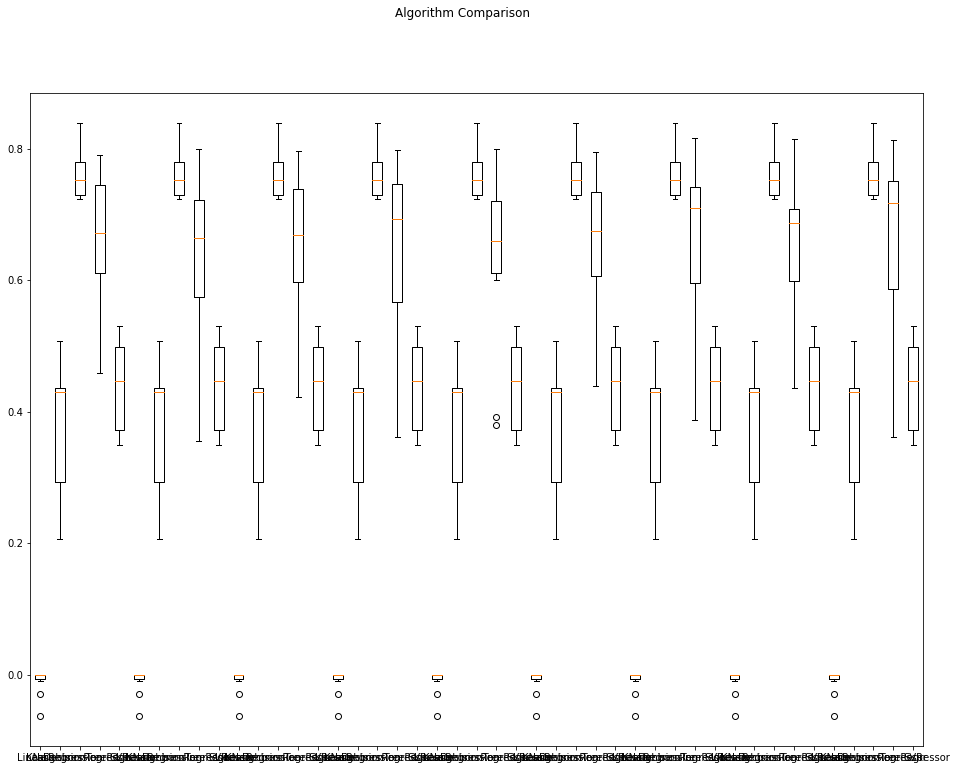

In [77]:
# Algorithm Comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_of_Re_mod)
ax.set_xticklabels(names2)
plt.show()

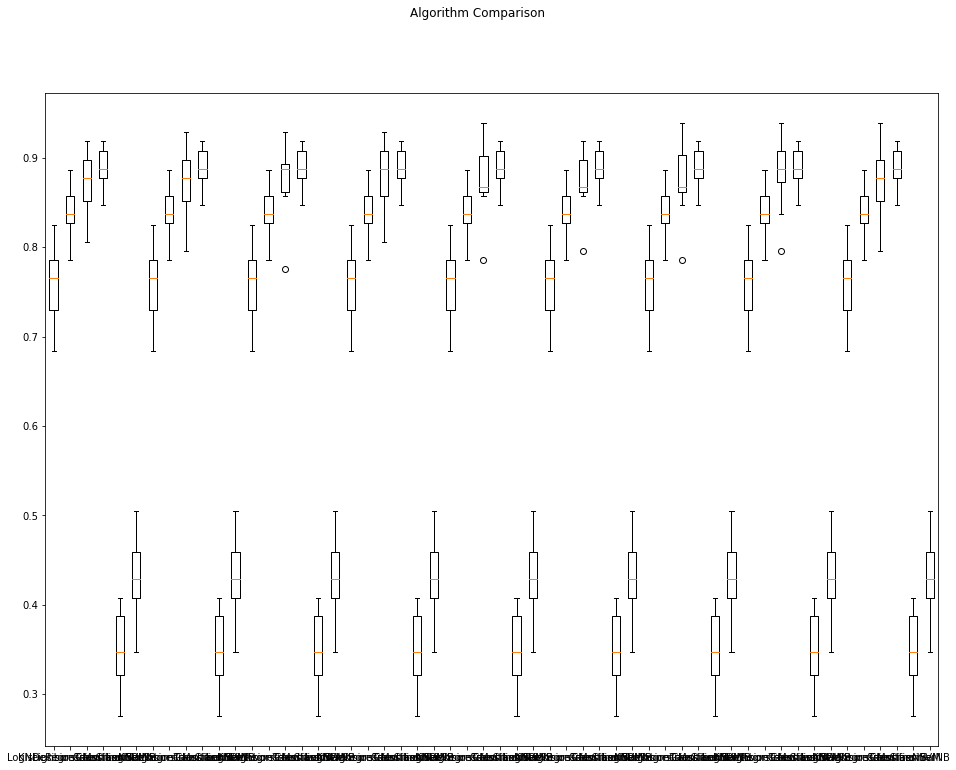

In [78]:
# Algorithm Comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_of_Cf_mod)
ax.set_xticklabels(names)
plt.show()

Here, i have used pipeline method to scale each models using staderscaler in to get the best resuls and values

In [80]:
# Standardize the dataset
pipelines_for_CF = []
pipelines_for_Re = []
pipelines_for_CF.append(('Scaled-LogisticRegression', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines_for_Re.append(('Scaled-LinearRegression', Pipeline([('Scaler', StandardScaler()),('LiR', LinearRegression())])))
pipelines_for_CF.append(('Scaled-KNeighborsClassifier', Pipeline([('Scaler', StandardScaler()),('KNC', KNeighborsClassifier())])))
pipelines_for_Re.append(('Scaled-KNeighborsRegressor', Pipeline([('Scaler', StandardScaler()),('KNR', KNeighborsRegressor())])))
pipelines_for_CF.append(('Scaled-DecisionTreeClassifier', Pipeline([('Scaler', StandardScaler()),('DTC', DecisionTreeClassifier())])))
pipelines_for_Re.append(('Scaled-DecisionTreeRegressor', Pipeline([('Scaler', StandardScaler()),('DTR', DecisionTreeRegressor())])))
pipelines_for_CF.append(('Scaled-MultinomialNB', Pipeline([('Scaler', StandardScaler()),('MNB', MultinomialNB())])))
pipelines_for_CF.append(('Scaled-GaussianNB', Pipeline([('Scaler', StandardScaler()),('GNB', GaussianNB())])))
pipelines_for_CF.append(('Scaled-SVC', Pipeline([('Scaler', StandardScaler()),('SVC', SVC())])))
pipelines_for_Re.append(('Scaled-SVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results_of_pip_Cf_mod = []
results_of_pip_Re_mod = []
pipeline_names_for_cf=[]
pipeline_names_for_re=[]
    
for names_of_re, re_models in pipelines_for_Re:
    cv_results_for_re = cross_val_score(re_models, X_train, Y_train,cv=kfold,scoring=scoring_re)
    results_of_pip_Re_mod.append(cv_results_for_re)
    pipeline_names_for_re.append(names_of_re)
    print(f'\n\nNames-: {names_of_re}, The Mean-: {cv_results_for_re.mean()*100},\n The Std-: {cv_results_for_re.std()*100},\ncross_val_score-:{cv_results_for_re*100}')
    
print('\n')
print('----------------------------------------------------------------------------------------')
print('\n')    
for names_of_cf, cf_models in pipelines_for_CF:
    cv_results_for_cf = cross_val_score(cf_models, x_train, y_train, cv=kfold, scoring=scoring_cf)
    results_of_pip_Cf_mod.append(cv_results_for_cf)
    pipeline_names_for_cf.append(names_of_cf)
    print(f'\n\nNames-: {names_of_cf}, The Mean-: {cv_results_for_cf.mean()*100},\n The Std-: {cv_results_for_cf.std()*100},\ncross_val_score-:{cv_results_for_re*100}')



Names-: Scaled-LinearRegression, The Mean-: 38.01759350372104,
 The Std-: 9.624860094097274,
cross_val_score-:[20.60931078 43.48989449 25.93154573 48.0318747  50.701496   25.70115463
 43.06412325 43.81497405 40.75084186 32.54739706 43.55091601]


Names-: Scaled-KNeighborsRegressor, The Mean-: 78.21082410880462,
 The Std-: 4.61142448853796,
cross_val_score-:[77.24329856 80.0661309  71.76274821 71.6812137  74.04273597 81.18585991
 84.20769308 73.53886385 83.94592327 79.19409886 83.45049887]


Names-: Scaled-DecisionTreeRegressor, The Mean-: 65.57747357162899,
 The Std-: 11.856009312242822,
cross_val_score-:[38.40107129 49.70120065 63.86074694 72.39578161 62.35687565 68.95280793
 77.47815607 67.88585716 80.32106444 63.63669203 76.36195552]


Names-: Scaled-SVR, The Mean-: 75.32570284134181,
 The Std-: 4.209300160091691,
cross_val_score-:[70.87141092 75.04978618 69.75137089 79.68260871 74.79589913 75.80019223
 79.44731889 71.59205298 82.567088   70.05527771 78.96972561]


---------------

After using staderd scaler to the models and the difference

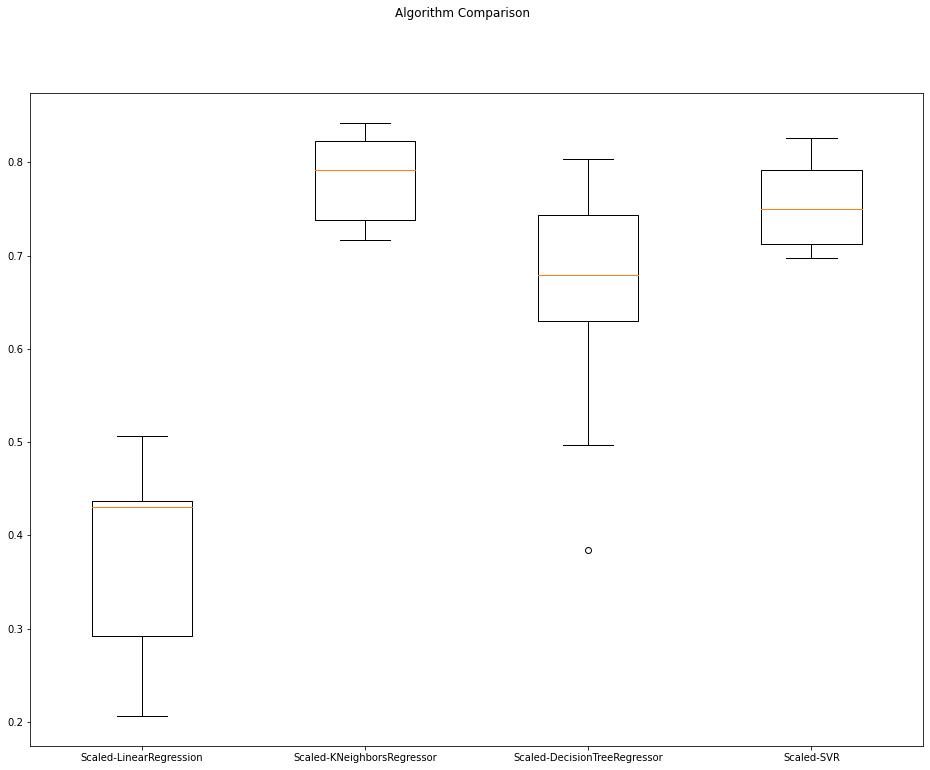

In [81]:
# Algorithm Comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_of_pip_Re_mod)
ax.set_xticklabels(pipeline_names_for_re)
plt.show()

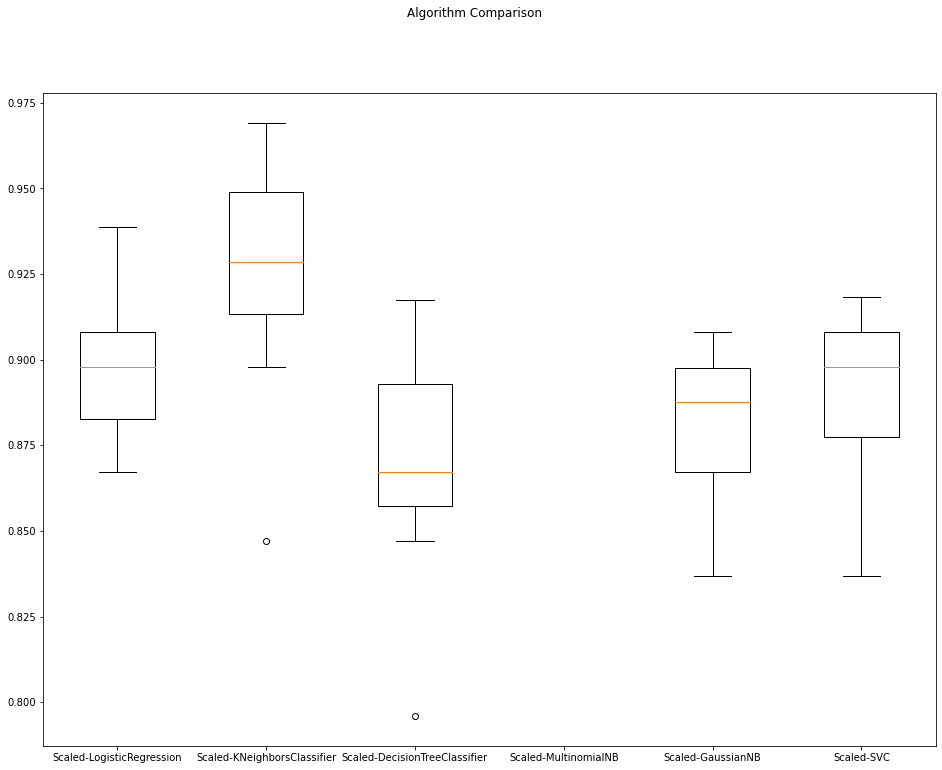

In [82]:
# Algorithm Comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_of_pip_Cf_mod)
ax.set_xticklabels(pipeline_names_for_cf)
plt.show()

# Ensemble Models 

In here, i am going to use ensemble models for to boost the algorithms

In [83]:
# Ensembles Models
ensembles_of_Cf=[]
ensembles_of_Re=[]
ensembles_of_Cf.append(('AdaBoostClassifier', AdaBoostClassifier()))
ensembles_of_Re.append(('AdaBoostRegressor', AdaBoostRegressor()))
ensembles_of_Cf.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
ensembles_of_Re.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
ensembles_of_Cf.append(('RandomForestClassifier', RandomForestClassifier()))
ensembles_of_Re.append(('RandomForestRegressor', RandomForestRegressor()))
results_of_Cf=[]
results_of_Re=[]
names=[]
names2=[]
# Evaluating each model in turn
    
for name, re_models in ensembles_of_Re:
    cv_results_for_re = cross_val_score(re_models, X_train, Y_train,scoring=scoring_re)
    results_of_Re_mod.append(cv_results_for_re)
    names2.append(name)
    print(f'\n\nnnames-:{name}, The mean-:{100*cv_results_for_re.mean()},\n The std-:{100*cv_results_for_re.std()},\n cross_val_score-:{cv_results_for_re*100}')

print('\n')
    
for name, cf_models in ensembles_of_Cf:
    cv_results_for_cf = cross_val_score(cf_models, x_train, y_train, cv=kfold, scoring=scoring_cf)
    results_of_Cf_mod.append(cv_results_for_cf)
    names.append(name)
    print(f'names-:{name}, The mean-:{100*cv_results_for_cf.mean()},\n The std:{100*cv_results_for_cf.std()},\n cross_val_score-:{cv_results_for_re}')



nnames-:AdaBoostRegressor, The mean-:59.0782047033384,
 The std-:2.678423150039151,
 cross_val_score-:[60.53204271 62.55158739 55.43457067 60.3847253  56.48809745]


nnames-:GradientBoostingRegressor, The mean-:72.22657811046392,
 The std-:1.734610418407183,
 cross_val_score-:[72.19020347 71.68414719 74.76861519 69.46174607 73.02817862]


nnames-:RandomForestRegressor, The mean-:79.39197649872747,
 The std-:2.191686180916932,
 cross_val_score-:[76.30352534 78.90811484 80.50617869 78.38695612 82.85510751]


names-:AdaBoostClassifier, The mean-:12.90572461411931,
 The std:2.7928411780981333,
 cross_val_score-:[0.76303525 0.78908115 0.80506179 0.78386956 0.82855108]
names-:GradientBoostingClassifier, The mean-:88.67605148901173,
 The std:2.580046092063157,
 cross_val_score-:[0.76303525 0.78908115 0.80506179 0.78386956 0.82855108]
names-:RandomForestClassifier, The mean-:96.19570414857603,
 The std:2.263493616553264,
 cross_val_score-:[0.76303525 0.78908115 0.80506179 0.78386956 0.828551

So from the above analysis and test i have chossen KNeighbors for both Regression and Classification model

# Best Algorithm Parameter chosing for KNeighbors

Here, i'll be using Gridsearch cv for both model to find out the best parameters for these models

In [87]:
#KNeighborsClassifier algorithm 
ST_scaler=StandardScaler().fit(x_train)
rescaledstx=ST_scaler.transform(x_train)
model=KNeighborsClassifier()
neighbors=[1,2,3,4,5,6,7,8,9,10]
KNN_ParamGrid=dict(n_neighbors=neighbors)
gs_for_knn=GridSearchCV(estimator=model, param_grid=KNN_ParamGrid, cv=kfold,scoring=scoring_cf)
GSCV_result_for_KNN=gs_for_knn.fit(rescaledstx, y_train)
print(f'Best{GSCV_result_for_KNN.best_score_}, by Using {GSCV_result_for_KNN.best_params_}')
means = GSCV_result_for_KNN.cv_results_['mean_test_score']
stds = GSCV_result_for_KNN.cv_results_['std_test_score']
params = GSCV_result_for_KNN.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'\n\nmean-:{mean},\n stdev-:{stdev},\n param-:{param}')

Best0.9545167645314921, by Using {'n_neighbors': 1}


mean-:0.9545167645314921,
 stdev-:0.021893570032763883,
 param-:{'n_neighbors': 1}


mean-:0.9433563491000899,
 stdev-:0.020589864466135203,
 param-:{'n_neighbors': 2}


mean-:0.9498689822695716,
 stdev-:0.018158902836453043,
 param-:{'n_neighbors': 3}


mean-:0.9294608190042652,
 stdev-:0.025864096650282695,
 param-:{'n_neighbors': 4}


mean-:0.9248321634183195,
 stdev-:0.035651469866734134,
 param-:{'n_neighbors': 5}


mean-:0.9220301053879847,
 stdev-:0.025422126235050233,
 param-:{'n_neighbors': 6}


mean-:0.9220396687259722,
 stdev-:0.028572603702116325,
 param-:{'n_neighbors': 7}


mean-:0.9071686781554235,
 stdev-:0.028300471845589134,
 param-:{'n_neighbors': 8}


mean-:0.9015932521087161,
 stdev-:0.026871247397541133,
 param-:{'n_neighbors': 9}


mean-:0.8830403764129833,
 stdev-:0.034557687845794646,
 param-:{'n_neighbors': 10}


What i have got from GSCV, the best parameter for KNeighborsClassifier is {neighbors:1}

In [88]:
#KNeighborsRegressor algorithm 
ST_scaler=StandardScaler().fit(X_train)
rescaledstX=ST_scaler.transform(X_train)
neighbors=[1,2,3,4,5,6,7,8,9,10]
KNN_ParamGrid=dict(n_neighbors=neighbors)
model=KNeighborsRegressor()
gs_for_knn=GridSearchCV(estimator=model, param_grid=KNN_ParamGrid,cv=kfold,scoring=scoring_re)
GSCV_result_for_KNN=gs_for_knn.fit(rescaledstX, Y_train)
print(f'Best{GSCV_result_for_KNN.best_score_}, by Using {GSCV_result_for_KNN.best_params_}')
print('\n')
means = GSCV_result_for_KNN.cv_results_['mean_test_score']
stds = GSCV_result_for_KNN.cv_results_['std_test_score']
params = GSCV_result_for_KNN.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'\n\nmean-:{mean}, \nstdev-:{stdev},\n param-:{param}')

Best0.8064568358696182, by Using {'n_neighbors': 3}




mean-:0.7803311634548642, 
stdev-:0.04958388322998973,
 param-:{'n_neighbors': 1}


mean-:0.8062068479299653, 
stdev-:0.0423381714100763,
 param-:{'n_neighbors': 2}


mean-:0.8064568358696182, 
stdev-:0.03919317606090181,
 param-:{'n_neighbors': 3}


mean-:0.7995535945177813, 
stdev-:0.03752517104795579,
 param-:{'n_neighbors': 4}


mean-:0.7824034843971052, 
stdev-:0.047021657038903916,
 param-:{'n_neighbors': 5}


mean-:0.7725891102555422, 
stdev-:0.0522730426650306,
 param-:{'n_neighbors': 6}


mean-:0.7559564656298449, 
stdev-:0.05841215273266982,
 param-:{'n_neighbors': 7}


mean-:0.7398184447620793, 
stdev-:0.05720065867211382,
 param-:{'n_neighbors': 8}


mean-:0.7275094899738099, 
stdev-:0.058558278096991566,
 param-:{'n_neighbors': 9}


mean-:0.7127839281601984, 
stdev-:0.05797250593991486,
 param-:{'n_neighbors': 10}


And in here What i have got from GSCV, the best parameter for KNeighborsClassifier is {neighbors:1}

# Final Model Preparing

In [89]:
# Preparing the model for Regressor
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
Knn_Re = KNeighborsRegressor(n_neighbors=3)
Knn_Re.fit(rescaledX, Y_train)
# Transform the validation dataset and predict
rescaledtestX = scaler.transform(X_test)
predictions = Knn_Re.predict(rescaledtestX)
print(mean_absolute_error(Y_test, predictions))
print(mean_squared_error(Y_test, predictions))
print('\n')
print(r2_score(Y_test, predictions))

0.0600928505106778
0.006369668833178582


0.8237413103231542


In [90]:
# Preparing the model for Classification
scaler = StandardScaler().fit(x_train)
rescaledx = scaler.transform(x_train)
Knn_Cf = KNeighborsClassifier(n_neighbors=1)
Knn_Cf.fit(rescaledx, y_train)
# Transform the validation dataset and predict
rescaledtestx = scaler.transform(x_test)
predictions = Knn_Cf.predict(rescaledtestx)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

0.9777158774373259
[[14  0  0 ...  0  0  0]
 [ 0 15  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  7]]


              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        13
           4       1.00      0.95      0.97        20
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        11
          13       1.00      1.00      1.00         5
          14

# As we can see here, that my two models, one on classfication and other on reggresion both of my models are giving above 80% accuracy which under-

1.KNeighborsRegressor

2.KNeighborsClassifier

# Model saving

In [91]:
import pickle
filename_for_reggression='Avocado_dataset_Regression.pkl'
filename_for_classification='Avocado_dataset_classification.pkl'
pickle.dump(Knn_Re,open(filename_for_reggression,'wb'))
pickle.dump(KNeighborsClassifier,open(filename_for_classification,'wb'))

# Conclusion:-

In [92]:
a=np.array(Y_test)
b=np.array(y_test)
predicted_X=np.array(Knn_Re.predict(rescaledtestX))
predicted_x=np.array(Knn_Cf.predict(rescaledtestx))

In [93]:
df_Re=pd.DataFrame({'oiginal':a,'predicted':predicted_X}, index=range(len(a)))

In [94]:
df_Cf=pd.DataFrame({'oiginal':b,'predicted':predicted_x},index=range(len(a)))

In [95]:
df_Re

,oiginal,predicted
0,1.05,0.900000
1,1.03,1.113333
2,1.03,1.106667
3,0.65,0.620000
4,1.30,1.180000
...,...,...
354,1.10,1.120000
355,1.17,1.243333
356,1.25,1.133333
357,1.19,1.020000


In [96]:
df_Cf

,oiginal,predicted
0,41,41
1,4,4
2,29,29
3,15,15
4,35,35
...,...,...
354,44,44
355,42,42
356,35,35
357,44,44
